In [1]:
import qutip
import numpy as np
import matplotlib.pylab as plt

In [2]:
from src.qdyn.io import read_indexed_matrix
from src.plots import show_spy

In [3]:
%matplotlib notebook

In [4]:
V_per_cm = 1.0 / 5.14220624463189208e09

In [5]:
def rydberg_hamiltonian(
    H_drift_file, H_sigma_file, H_pi_file, F_DC, Omega_sigma
):
    """Construct the time-dependent Hamiltonian

    Args:
        H_drift_file (str)
        H_sigma_file (str)
        H_pi_file (str)
        F_DC (float)
        Omega_sig (callable)
    """
    H_drift = qutip.Qobj(read_indexed_matrix(H_drift_file, expand_hermitian=False))
    H_sigma = qutip.Qobj(read_indexed_matrix(H_sigma_file, expand_hermitian=True))
    H_pi = qutip.Qobj(read_indexed_matrix(H_pi_file, expand_hermitian=False))
    H_0 = H_drift + F_DC * H_pi
    return [H_0, [H_sigma, Omega_sigma]]

In [6]:
H = rydberg_hamiltonian(
    'data/ham_drift.dat',
    'data/ham_sig.dat',
    'data/ham_pi.dat',
    F_DC=2.5 * V_per_cm,
    Omega_sigma=None
)

<IPython.core.display.Javascript object>


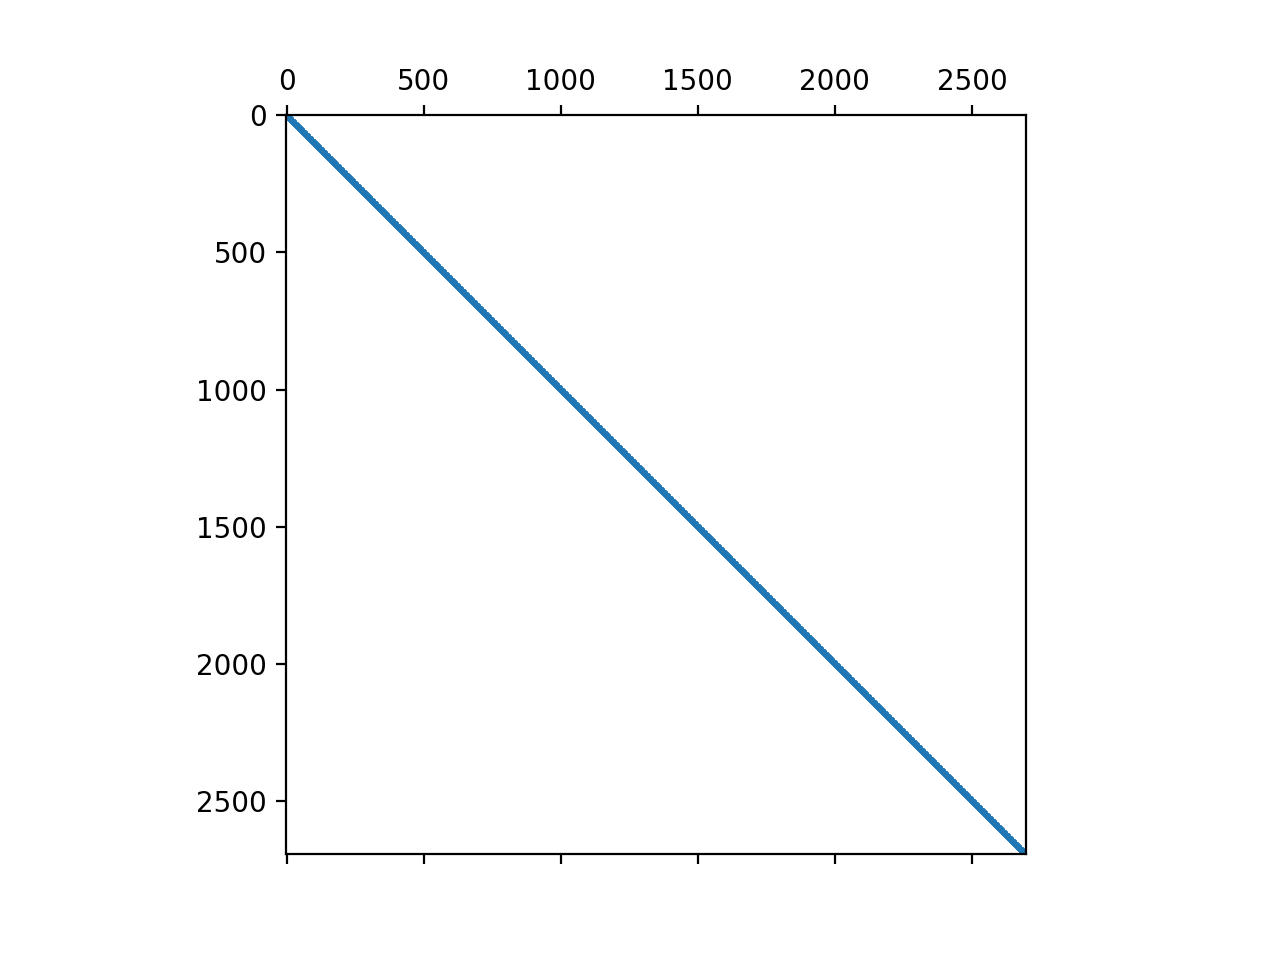

/home/goerz/rydberg_parallelization/src/plots.py:11: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.
  plt.show(fig)


In [7]:
show_spy(H[0].data, show_diagonal=False)

<IPython.core.display.Javascript object>


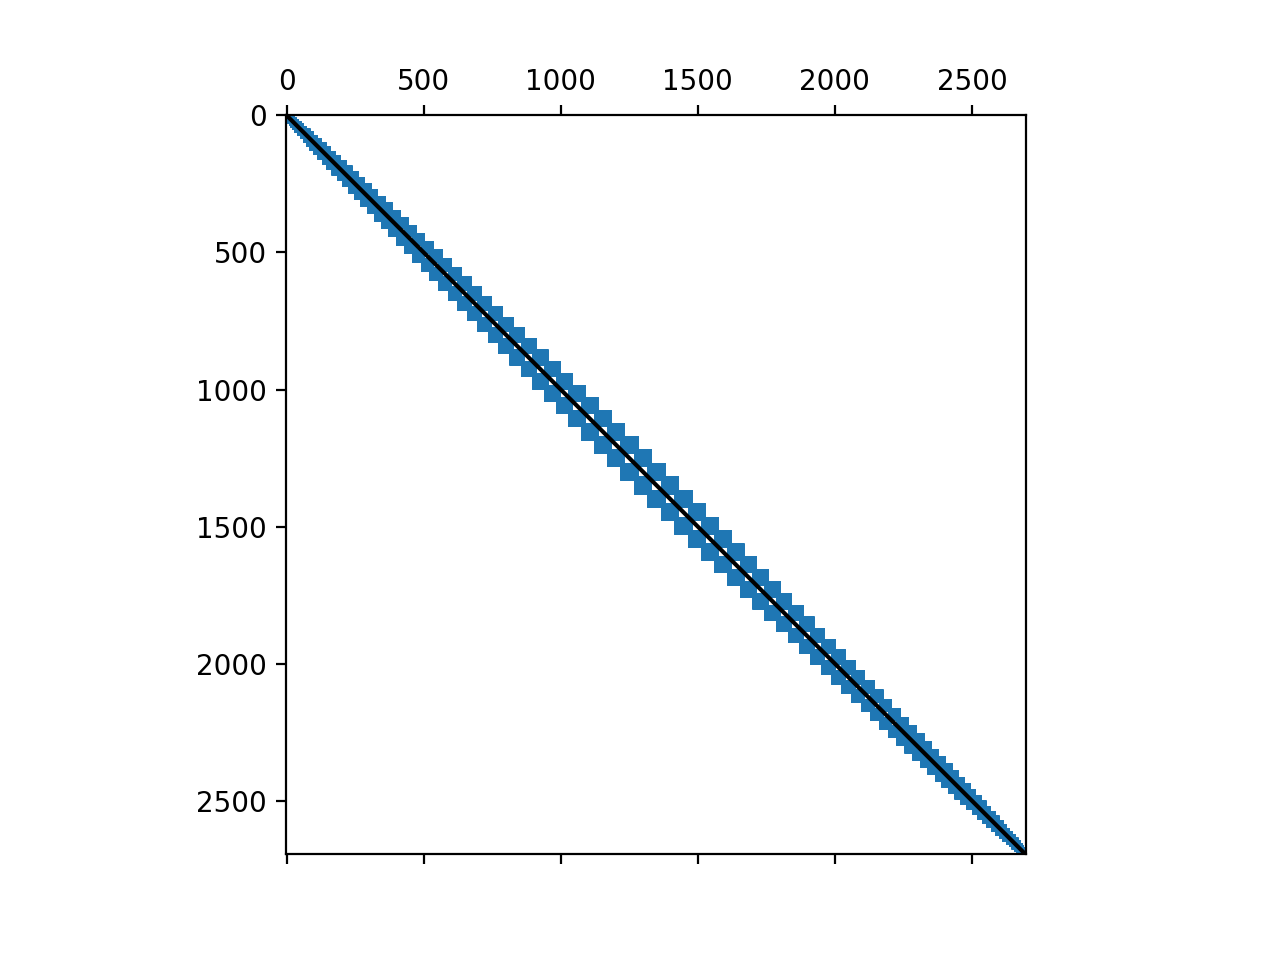

In [8]:
show_spy(H[1][0].data, show_diagonal=True)